In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet, imagenet_utils
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet import preprocess_input
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions, preprocess_input
from matplotlib.pyplot import imread
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import cv2
from pprint import pprint

2022-11-18 11:41:45.320472: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Loding an image

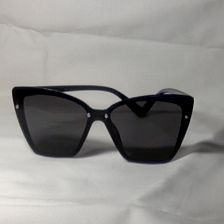

In [9]:
# read an image
im = image.load_img('/Users/Varvara/spiced_projects/imageclassifier/images/sunglasses/21-53-37-003332.png', 
                    target_size=(224, 224))
im

In [10]:
a = image.img_to_array(im)
a = preprocess_input(a)
a

array([[[ 0.4666667 ,  0.427451  ,  0.39607847],
        [ 0.48235297,  0.45098042,  0.41176474],
        [ 0.48235297,  0.45098042,  0.41176474],
        ...,
        [ 0.09019613,  0.07450986,  0.05882359],
        [ 0.09019613,  0.09019613,  0.06666672],
        [ 0.10588241,  0.10588241,  0.082353  ]],

       [[ 0.4666667 ,  0.427451  ,  0.39607847],
        [ 0.47450984,  0.4431373 ,  0.4039216 ],
        [ 0.47450984,  0.4431373 ,  0.4039216 ],
        ...,
        [ 0.09803927,  0.09019613,  0.06666672],
        [ 0.10588241,  0.10588241,  0.082353  ],
        [ 0.12156868,  0.11372554,  0.09019613]],

       [[ 0.45882356,  0.427451  ,  0.39607847],
        [ 0.47450984,  0.4431373 ,  0.4039216 ],
        [ 0.47450984,  0.427451  ,  0.39607847],
        ...,
        [ 0.09019613,  0.09019613,  0.05882359],
        [ 0.09803927,  0.09803927,  0.07450986],
        [ 0.11372554,  0.11372554,  0.09019613]],

       ...,

       [[ 0.7254902 ,  0.67058825,  0.6392157 ],
        [ 0

In [11]:
a.shape

(224, 224, 3)

In [12]:
# reshape the array to (1, 224, 224, 3)
array = a.reshape(1, 224, 224, 3)

### Loading MobileNetV2

In [13]:
# load MobileNetV2
model_mn = MobileNetV2(weights='imagenet', include_top=True)
model_mn.summary()

2022-11-18 11:42:11.737670: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

#### Prediction

In [14]:
predictions = model_mn.predict(array)

1/1 [==============================] - 7s 7s/step


In [15]:
# print the 10 most probable classes
pprint(decode_predictions(predictions, 10))

[[('n04355933', 'sunglass', 0.70824164),
  ('n04356056', 'sunglasses', 0.24522297),
  ('n02883205', 'bow_tie', 0.0016422962),
  ('n02892767', 'brassiere', 0.0011756516),
  ('n03476684', 'hair_slide', 0.0011622468),
  ('n03908618', 'pencil_box', 0.00076347974),
  ('n04026417', 'purse', 0.000637474),
  ('n02965783', 'car_mirror', 0.0005833539),
  ('n04133789', 'sandal', 0.0005290114),
  ('n03929660', 'pick', 0.00043586854)]]


####  Inspect intermediate output

In [16]:
# visualize the intermediate output of each CNN layer
intermediate_layer_model = Model(inputs=model_mn.input,
                                 outputs=[
                                     model_mn.get_layer(index=2).output,
                                     model_mn.get_layer(index=100).output
                                 ])

cnn2, cnn100 = intermediate_layer_model.predict(array)
cnn2.shape, cnn100.shape

1/1 [==============================] - 3s 3s/step


((1, 112, 112, 32), (1, 14, 14, 576))

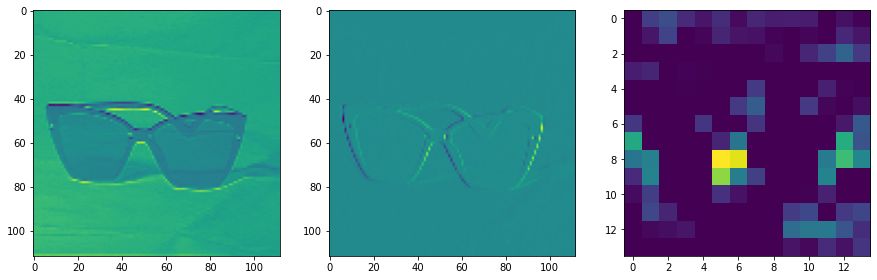

In [17]:
#  visualize a few feature maps
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cnn2[0,:, :, 0])

plt.subplot(1, 3, 2)
plt.imshow(cnn2[0,:, :, 1])

plt.subplot(1, 3, 3)
plt.imshow(cnn100[0,:, :, 0]);

### Classification with InspectionV3

#### Load an image

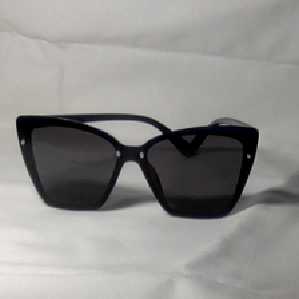

In [25]:
img_inception = image.load_img('/Users/Varvara/spiced_projects/imageclassifier/images/sunglasses/21-53-37-003332.png', target_size=(299, 299))
img_inception

In [26]:
# convert image to an array
a_inception = image.img_to_array(img_inception)

In [27]:
# preprocess the input
array_inception = preprocess_input(a_inception)

In [28]:
# reshape the array to (1, 299, 299, 3)
array_inception = array_inception.reshape(1, 299, 299, 3)

In [29]:
array_inception.shape

(1, 299, 299, 3)

#### Loading InceptionV3

In [30]:
# instantiates the Inception v3 architecture
inception_model = InceptionV3()
inception_model.summary()

In [31]:
# predict
predictions_inc = inception_model.predict(array_inception)

1/1 [==============================] - 4s 4s/step


In [60]:
pprint(decode_predictions(predictions_inc, 10))

[[('n04355933', 'sunglass', 0.5128178),
  ('n04356056', 'sunglasses', 0.4850809),
  ('n03692522', 'loupe', 2.454728e-05),
  ('n04357314', 'sunscreen', 2.2534638e-05),
  ('n04162706', 'seat_belt', 2.0324323e-05),
  ('n01855032', 'red-breasted_merganser', 1.7725362e-05),
  ('n01753488', 'horned_viper', 1.3215556e-05),
  ('n09421951', 'sandbar', 1.2237146e-05),
  ('n02807133', 'bathing_cap', 1.11015615e-05),
  ('n02011460', 'bittern', 1.0796699e-05)]]


####  Inspect intermediate output

In [33]:
intermediate_layer_model = Model(inputs=inception_model.input,
                                 outputs=[
                                     inception_model.get_layer(index=2).output,
                                     inception_model.get_layer(index=100).output
                                 ])

cnn2, cnn100 = intermediate_layer_model.predict(array_inception)
cnn2.shape, cnn100.shape

1/1 [==============================] - 1s 1s/step


((1, 149, 149, 32), (1, 17, 17, 768))

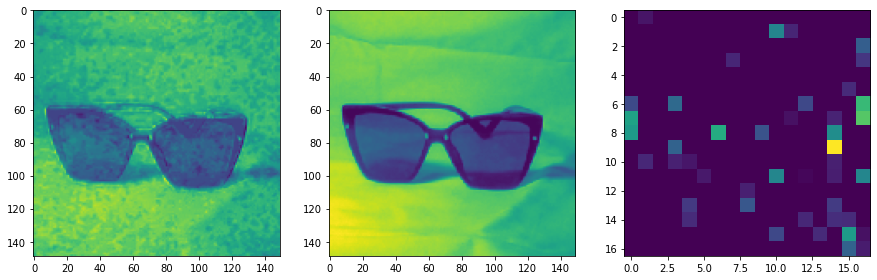

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cnn2[0,:, :, 0])
plt.subplot(1, 3, 2)
plt.imshow(cnn2[0,:, :, 1])
plt.subplot(1, 3, 3)
plt.imshow(cnn100[0,:, :, 3]);

#### ResNet50

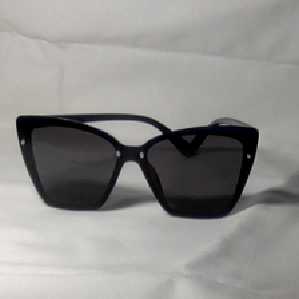

In [36]:
img_resnet = image.load_img('/Users/Varvara/spiced_projects/imageclassifier/images/sunglasses/21-53-37-003332.png', target_size=(299, 299))
img_resnet

In [37]:
# convert image to an array
a_resnet = image.img_to_array(img_resnet)

In [48]:
# preprocess the input
array_resnet = preprocess_input(a_resnet)

In [50]:
# reshape the array to (1, 224, 224, 3)
array_resnet = array_resnet[:224, :224, :]
array_resnet = array_resnet.reshape(1, 224, 224, 3)

In [51]:
array_resnet.shape

(1, 224, 224, 3)

In [52]:
resnet_model = ResNet50()

In [55]:
#resnet_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              #metrics=['accuracy'])

In [53]:
# predict
predictions_res = resnet_model.predict(array_resnet)

1/1 [==============================] - 3s 3s/step


In [56]:
pprint(decode_predictions(predictions_res, 10))

[[('n01930112', 'nematode', 0.15013713),
  ('n03041632', 'cleaver', 0.025875483),
  ('n03729826', 'matchstick', 0.024147071),
  ('n03838899', 'oboe', 0.02383984),
  ('n04270147', 'spatula', 0.02244943),
  ('n03804744', 'nail', 0.021577695),
  ('n03476684', 'hair_slide', 0.020120852),
  ('n02804610', 'bassoon', 0.018547771),
  ('n02783161', 'ballpoint', 0.017133588),
  ('n02667093', 'abaya', 0.012338053)]]


In [57]:
# visualize the intermediate output of each CNN layer
intermediate_layer_model = Model(inputs=resnet_model.input,
                                 outputs=[
                                     resnet_model.get_layer(index=2).output,
                                     resnet_model.get_layer(index=100).output
                                 ])

cnn2, cnn100 = intermediate_layer_model.predict(array_resnet)
cnn2.shape, cnn100.shape

1/1 [==============================] - 2s 2s/step


((1, 112, 112, 64), (1, 14, 14, 1024))

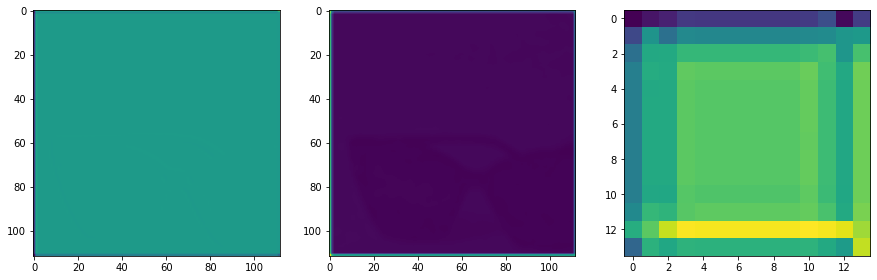

In [58]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cnn2[0,:, :, 0])
plt.subplot(1, 3, 2)
plt.imshow(cnn2[0,:, :, 1])
plt.subplot(1, 3, 3)
plt.imshow(cnn100[0,:, :, 3]);